## Basic listing

In [1]:
import s3fs
s3 = s3fs.S3FileSystem(anon=True)
s3.ls('dharani-fetal-brain-atlas')

['dharani-fetal-brain-atlas/data2d',
 'dharani-fetal-brain-atlas/data3d',
 'dharani-fetal-brain-atlas/ontology']

## check accessor

In [2]:
import sys
sys.path.append('..')
from image_access import PyrTifAccessor

In [3]:
s3baseurl = 's3://dharani-fetal-brain-atlas/'

samplefilename = 'data2d/specimen_1/Specimen_1_1000.tiff'

s3url = s3baseurl + samplefilename




In [4]:

accessor = PyrTifAccessor(s3url)

In [5]:
accessor.get_info()


{'series': [{'levels': [{'pages': [{'imagewidth': 64000,
       'tilewidth': 2048,
       'tilelength': 2048,
       'dtype': dtype('uint8'),
       'compression': <COMPRESSION.JPEG: 7>,
       'samplesperpixel': 3,
       'tiles_per_row': 32,
       'tiles_per_column': 32}]},
    {'pages': [{'imagewidth': 32000,
       'tilewidth': 2048,
       'tilelength': 2048,
       'dtype': dtype('uint8'),
       'compression': <COMPRESSION.JPEG: 7>,
       'samplesperpixel': 3,
       'tiles_per_row': 16,
       'tiles_per_column': 16}]},
    {'pages': [{'imagewidth': 16000,
       'tilewidth': 2048,
       'tilelength': 2048,
       'dtype': dtype('uint8'),
       'compression': <COMPRESSION.JPEG: 7>,
       'samplesperpixel': 3,
       'tiles_per_row': 8,
       'tiles_per_column': 8}]},
    {'pages': [{'imagewidth': 8000,
       'tilewidth': 2048,
       'tilelength': 2048,
       'dtype': dtype('uint8'),
       'compression': <COMPRESSION.JPEG: 7>,
       'samplesperpixel': 3,
       'tiles

In [6]:
from matplotlib import pyplot as plt

In [7]:
num_series=len(accessor.infodict['series'])
num_series

1

In [8]:
num_levels = len(accessor.infodict['series'][0]['levels'])
num_levels

6

In [9]:
num_pages = len(accessor.infodict['series'][0]['levels'][5]['pages'])
num_pages

1

In [10]:
accessor.get_info(0,4,0)

{'imagewidth': 4000,
 'tilewidth': 2048,
 'tilelength': 2048,
 'dtype': dtype('uint8'),
 'compression': <COMPRESSION.JPEG: 7>,
 'samplesperpixel': 3,
 'tiles_per_row': 2,
 'tiles_per_column': 2}

In [11]:
np_tile=accessor.get_tile(0,5,0,0)

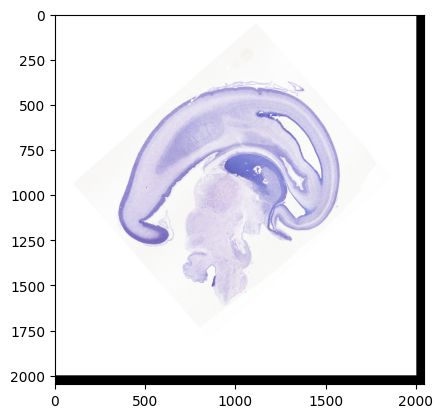

In [12]:
plt.imshow(np_tile)

In [13]:
np_tile=accessor.get_tile(0,4,0,0)

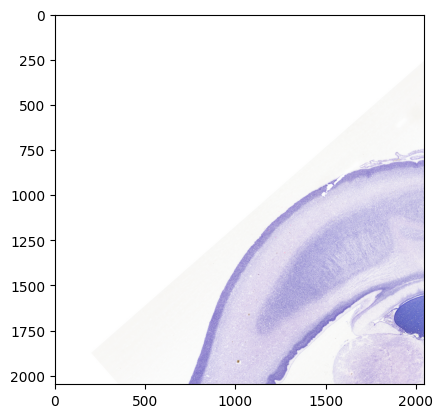

In [14]:
plt.imshow(np_tile)

In [15]:
np_rgn = accessor.get_region(0,4,0,1500,1000,1000,800)

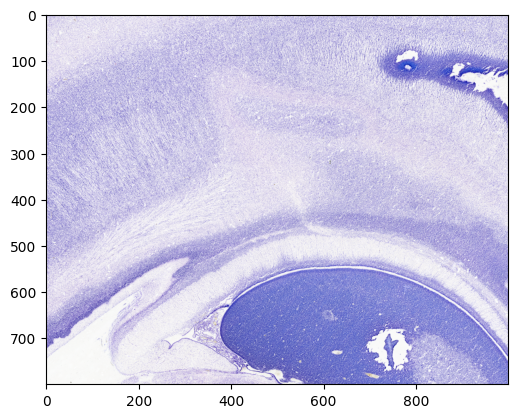

In [16]:
plt.imshow(np_rgn)

## check json

In [3]:
from ontology_handling import TreeHelper

In [4]:
ontohelper = TreeHelper()

In [5]:
ontohelper.print_tree()

[lvl] id (acronym) name
---------------------
 [0] 1 (Br) Brain
   [1] 2 (FB) Forebrain
     [2] 3 (Tel) Telencephalon
       [3] 4 (Ctx) Cerebral cortex
         [*] 5 (SGL-CTX) Subpial granular layer, cerebral cortex
         [*] 6 (MZ-CTX) Marginal zone, cerebral cortex
         [*] 7 (CP-CTX) Cortical plate, cerebral cortex
         [*] 8 (SP-CTX) Subplate zone, cerebral cortex
         [*] 9 (IZ-CTX) Intermediate zone, cerebral cortex
         [*] 10 (SVZ-CTX) Subventricular zone, cerebral cortex
         [*] 11 (VZ-CTX) Ventricular zone, cerebral cortex
         [4] 12 (FCtx) Frontal cortex
           [*] 13 (SGL-FCTx) Subpial granular layer, frontal cortex
           [*] 14 (MZ-FCTx) Marginal zone, frontal cortex
           [*] 15 (CP-FCTx) Cortical plate, frontal cortex
           [*] 16 (SP-FCTx) Subplate zone, frontal cortex
           [*] 17 (IZ-FCTx) Intermediate zone, frontal cortex
           [*] 18 (SVZ-FCTx) Subventricular zone, frontal cortex
           [*] 19 (VZ-FCTx

In [6]:
ontohelper.groups

{'HPF': ['HPF'],
 'AMY_BN': ['AMY', 'BN'],
 'Mig': ['Lms', 'Rms', 'GE'],
 'HY': ['HY'],
 'TH': ['TH'],
 'MB': ['MB'],
 'HB': ['HB'],
 'CB': ['CB'],
 'dev': ['dev'],
 'ft': ['ft'],
 'Vs': ['Vs'],
 'Ctx': ['Ctx']}

In [7]:
ontohelper.print_subtree('HPF')

[lvl] id (acronym) name
---------------------
 [0] 66 (HPF) Hippocampal formation
   [*] 67 (SGL-HPF) Subpial granular layer, hippocampal formation
   [*] 68 (MZ-HPF) Marginal zone, hippocampal formation
   [*] 69 (CP-HPF) Cortical plate, hippocampal formation
   [*] 70 (SP-HPF) Subplate zone, hippocampal formation
   [*] 71 (IZ-HPF) Intermediate zone, hippocampal formation
   [*] 72 (SVZ-HPF) Subventricular zone, hippocampal formation
   [*] 73 (VZ-HPF) Ventricular zone, hippocampal formation
   [1] 74 (HIP) Hippocampus
     [*] 75 (SGL-HIP) Subpial granular layer, hippocampus
     [*] 76 (MZ-HIP) Marginal zone, hippocampus
     [*] 77 (CP-HIP) Cortical plate, hippocampus
     [*] 78 (SP-HIP) Subplate zone, hippocampus
     [*] 79 (IZ-HIP) Intermediate zone, hippocampus
     [*] 80 (SVZ-HIP) Subventricular zone, hippocampus
     [*] 81 (VZ-HIP) Ventricular zone, hippocampus
     [2] 82 (DG) Dentate gyrus
     [2] 83 (CA) Ammon's horn
       [3] 386 (CA1) CA1 field of hippocampus
     

In [8]:
logicalareas = ontohelper.get_ids_of_cortical_areas()

In [9]:
logicalareas

defaultdict(list,
            {'-FCTx': [13, 14, 15, 16, 17, 18, 19],
             '-ORB': [22, 23, 24, 25, 26, 27, 28],
             '-PAR': [30, 31, 32, 33, 34, 35, 36],
             '-OCC': [39, 40, 41, 42, 43, 44, 45],
             '-TEMP': [48, 49, 50, 51, 52, 53, 54],
             '-ENT': [57, 58, 59, 60, 61, 62, 63],
             '-INS': [500, 501, 502, 503, 504, 505, 506],
             '-CING': [121, 122, 123, 124, 125, 126, 127]})

In [10]:
bylev4 = ontohelper.get_ids_by_level(4)

In [11]:
bylev4

[5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 20,
 21,
 29,
 37,
 38,
 46,
 47,
 55,
 65,
 64,
 117,
 118,
 120,
 130,
 131,
 132,
 133,
 134,
 136,
 137,
 293,
 294,
 295,
 138,
 393,
 296,
 297,
 141,
 145,
 148,
 152,
 155,
 254,
 260,
 256,
 257,
 259,
 282,
 172,
 173,
 176,
 413,
 384,
 178,
 179,
 418,
 180,
 181,
 182,
 183,
 184,
 185,
 298,
 299,
 409,
 410,
 306,
 186,
 187,
 411,
 412,
 302,
 303,
 304,
 307,
 308,
 309,
 188,
 189,
 190,
 191,
 280,
 322,
 323,
 324,
 325,
 326,
 194,
 195,
 320,
 321,
 197,
 200,
 285,
 444,
 403,
 404,
 263,
 262,
 261,
 201,
 428,
 449,
 283,
 453,
 429,
 264,
 265,
 266,
 206,
 207,
 208,
 267,
 268,
 269,
 209,
 372,
 378,
 374,
 375,
 376,
 314,
 315,
 316,
 270,
 273,
 274,
 275,
 276,
 277,
 278,
 373,
 279,
 212,
 213,
 214,
 305,
 336,
 430,
 348,
 352,
 357,
 358,
 359,
 360,
 363,
 364,
 365,
 366]

In [12]:
ontohelper.onto_lookup[5]

NodeRecord(acronym='SGL-CTX', name='Subpial granular layer, cerebral cortex', level=4, parentid=4)

In [13]:
layeredareas=ontohelper.get_ids_of_layered_areas()

In [14]:
layeredareas

defaultdict(list,
            {'SGL-': [13,
              22,
              30,
              39,
              48,
              57,
              67,
              75,
              86,
              94,
              102,
              110,
              500,
              121],
             'MZ-': [14,
              23,
              31,
              40,
              49,
              58,
              68,
              76,
              87,
              95,
              103,
              111,
              501,
              122],
             'CP-': [15,
              24,
              32,
              41,
              50,
              59,
              69,
              77,
              88,
              96,
              104,
              112,
              502,
              123],
             'SP-': [16,
              25,
              33,
              42,
              51,
              60,
              70,
              78,
              420,
              422,


In [15]:
ontohelper.onto_lookup[22]

NodeRecord(acronym='SGL-ORB', name='Subpial granular layer, orbital cortex', level=5, parentid=21)

In [16]:
ontohelper.onto_lookup[5]

NodeRecord(acronym='SGL-CTX', name='Subpial granular layer, cerebral cortex', level=4, parentid=4)

In [17]:
ontohelper.onto_lookup[4]

NodeRecord(acronym='Ctx', name='Cerebral cortex', level=3, parentid=3)

In [18]:
ontohelper.get_group_by_name('POST')

'HPF'

In [19]:
ungroupedids = []
for id,rec in ontohelper.onto_lookup.items():
    if ontohelper.get_group_by_name(rec.acronym) is None:
        ungroupedids.append(id)

In [23]:
[ontohelper.onto_lookup[id] for id in ungroupedids]

[NodeRecord(acronym='Br', name='Brain', level=0, parentid=0),
 NodeRecord(acronym='FB', name='Forebrain', level=1, parentid=1),
 NodeRecord(acronym='Tel', name='Telencephalon', level=2, parentid=2),
 NodeRecord(acronym='Di', name='Diencephalon', level=2, parentid=2),
 NodeRecord(acronym='BS', name='Brainstem', level=1, parentid=1),
 NodeRecord(acronym='Raphe', name='Raphe nuclei', level=2, parentid=440),
 NodeRecord(acronym='DR', name='Dorsal raphe nucleus', level=3, parentid=210),
 NodeRecord(acronym='RLI', name='Rostral linear raphe nucleus', level=3, parentid=210),
 NodeRecord(acronym='CLI', name='Caudal linear raphe nucleus', level=3, parentid=210),
 NodeRecord(acronym='MrN', name='Median raphe nucleus', level=3, parentid=210),
 NodeRecord(acronym='RM', name='Raphe magnus nucleus', level=3, parentid=210),
 NodeRecord(acronym='RIP', name='Raphe interpositus nucleus', level=3, parentid=210),
 NodeRecord(acronym='RPA', name='Raphe pallidus nucleus', level=3, parentid=210),
 NodeRecord